In [215]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model

from collections import defaultdict

In [123]:
# load saved data (make sure to download w/ downloadData.py)
event = '2020ncwak'

with open(f"data/{event}.json", 'r') as f:
    json_data = json.load(f)

json_data.keys()
matches = json_data['matches']
oprs = json_data['oprs']
teams = json_data['teams']

In [247]:
# parse into pandas dataframe
def flatten_data_matches(json_data):
    data_dict = defaultdict(list)

    for match in matches:
        match_data = matches[match]
        
        data_dict['match_key'].append(match_data['key'])
        data_dict['match_type'].append(match_data['match_type'])
        data_dict['match_number'].append(match_data['number'])

        for alliance_color in ['blue', 'red']:
            alliance_data = match_data['alliances'][alliance_color]
            for robot_num, robot_key in enumerate(alliance_data['team_keys']):
                data_dict[f"{alliance_color}_{robot_num+1}_key"].append(robot_key)
            data_dict[f"{alliance_color}_keys"].append(alliance_data['team_keys'])
            
            score_breakdown = alliance_data['score_breakdown']
            
            data_dict[f"{alliance_color}_endgame_level"].append(score_breakdown['endgame_level'])
            data_dict[f"{alliance_color}_foul_count"].append(score_breakdown['foul_count'])
            data_dict[f"{alliance_color}_points_scored"].append(score_breakdown['points_scored'])
            data_dict[f"{alliance_color}_max_stage"].append(score_breakdown['max_stage'])
            data_dict[f"{alliance_color}_hang_rp"].append(score_breakdown['rp']['shield_operational'])
            data_dict[f"{alliance_color}_wheel_rp"].append(score_breakdown['rp']['shield_energized'])
            
            for robot_num, init_line_points in enumerate(score_breakdown['init_lines']):
                data_dict[f"{alliance_color}_{robot_num+1}_init_line"].append(init_line_points)
            for robot_num, endgame_points in enumerate(score_breakdown['endgames']):
                data_dict[f"{alliance_color}_{robot_num+1}_endgame"].append(endgame_points)
            
            for cell_placement in ['bottom', 'outer', 'inner']:
                for opmode in ['auto', 'teleop']:
                    data_dict[f"{alliance_color}_cells_{cell_placement}_{opmode}"].append(score_breakdown['cells'][cell_placement][opmode])
            

    df = pd.DataFrame(data=data_dict)
    return df

all_match_data = flatten_data_matches(json_data)
qualification_matches = all_match_data.loc[all_match_data['match_type'] == 'qm']
qualification_matches

,match_key,match_type,match_number,blue_1_key,blue_2_key,blue_3_key,blue_keys,blue_endgame_level,blue_foul_count,blue_points_scored,...,red_3_init_line,red_1_endgame,red_2_endgame,red_3_endgame,red_cells_bottom_auto,red_cells_bottom_teleop,red_cells_outer_auto,red_cells_outer_teleop,red_cells_inner_auto,red_cells_inner_teleop
11,2020ncwak_qm1,qm,1,frc435,frc6565,frc5511,"[frc435, frc6565, frc5511]",True,1,81,...,5,0,5,5,0,0,0,0,0,0
12,2020ncwak_qm10,qm,10,frc5919,frc7265,frc4291,"[frc5919, frc7265, frc4291]",True,0,10,...,5,0,0,25,0,0,3,0,0,0
13,2020ncwak_qm11,qm,11,frc435,frc6240,frc6502,"[frc435, frc6240, frc6502]",False,0,73,...,5,5,5,5,0,9,0,0,0,0
14,2020ncwak_qm12,qm,12,frc3459,frc4828,frc5190,"[frc3459, frc4828, frc5190]",False,0,107,...,5,5,5,0,0,0,0,0,0,0
15,2020ncwak_qm13,qm,13,frc7890,frc5518,frc5511,"[frc7890, frc5518, frc5511]",True,0,92,...,5,5,5,0,0,4,0,1,0,0
16,2020ncwak_qm14,qm,14,frc5607,frc5160,frc2642,"[frc5607, frc5160, frc2642]",True,0,27,...,0,5,0,5,0,0,2,1,1,1
17,2020ncwak_qm15,qm,15,frc6500,frc3459,frc6496,"[frc6500, frc3459, frc6496]",False,1,59,...,5,5,5,5,0,0,3,3,0,0
18,2020ncwak_qm16,qm,16,frc2059,frc5919,frc5762,"[frc2059, frc5919, frc5762]",False,4,37,...,5,5,5,5,0,5,1,5,2,0
19,2020ncwak_qm17,qm,17,frc8090,frc7890,frc3229,"[frc8090, frc7890, frc3229]",True,0,50,...,5,5,5,5,0,0,0,6,0,0
20,2020ncwak_qm18,qm,18,frc7671,frc5160,frc7463,"[frc7671, frc5160, frc7463]",False,0,54,...,0,5,5,0,1,1,0,0,0,0


In [249]:
# get team scores into a dataframe
team_scores = []

def get_match_team_data_breakdown(match_data, alliance_color):
    return [
        match_data[f'{alliance_color}_points_scored'],
        match_data[f'{alliance_color}_cells_bottom_auto'],
        match_data[f'{alliance_color}_cells_bottom_teleop'],
        match_data[f'{alliance_color}_cells_outer_auto'],
        match_data[f'{alliance_color}_cells_outer_teleop'],
        match_data[f'{alliance_color}_cells_inner_auto'],
        match_data[f'{alliance_color}_cells_inner_teleop']
    ] 

for _, match in qualification_matches.iterrows():
    for team in match['blue_keys']:
        team_scores.append([team] + get_match_team_data_breakdown(match, 'blue'))
    for team in match['red_keys']:
        team_scores.append([team] + get_match_team_data_breakdown(match, 'red'))
team_scores = pd.DataFrame(team_scores, columns=['team_key', 'team_score', 'bottom_auto_cells', 'bottom_teleop_cells', 'outer_auto_cells', 'outer_teleop_cells', 'inner_auto_cells', 'inner_teleop_cells'])
team_scores = team_scores.sort_values(by=['team_key'])

In [251]:
# get team data (like opr) into a dataframe
def get_feature(team_key, data, feature_name):
    return data.loc[data['team_key'] == team_key][feature_name]

team_data = []
for team in teams:
    team_data.append([
        team,
        oprs[team],
        np.mean(get_feature(team, team_scores, 'team_score')),
        np.mean(get_feature(team, team_scores, 'bottom_auto_cells')),
        np.mean(get_feature(team, team_scores, 'bottom_teleop_cells')),
        np.mean(get_feature(team, team_scores, 'outer_auto_cells')),
        np.mean(get_feature(team, team_scores, 'outer_teleop_cells')),
        np.mean(get_feature(team, team_scores, 'inner_auto_cells')),
        np.mean(get_feature(team, team_scores, 'inner_teleop_cells')),
    ])
team_data = pd.DataFrame(team_data, columns=['team_key', 'opr', 'mean_score', 'mean_bottom_auto_cells', 'mean_bottom_teleop_cells', 'mean_outer_auto_cells', 'mean_outer_teleop_cells', 'mean_inner_auto_cells', 'mean_inner_teleop_cells'])
team_data.sort_values(by=['mean_score'])

,team_key,opr,mean_score,mean_bottom_auto_cells,mean_bottom_teleop_cells,mean_outer_auto_cells,mean_outer_teleop_cells,mean_inner_auto_cells,mean_inner_teleop_cells
23,frc7265,-1.961211,31.833333,0.000000,0.916667,1.000000,1.750000,0.250000,0.083333
24,frc7463,5.859754,39.833333,0.666667,1.416667,1.333333,2.083333,0.166667,0.250000
13,frc5607,6.231308,45.583333,0.416667,0.666667,0.833333,4.500000,0.500000,0.416667
12,frc5518,16.583076,46.000000,0.333333,1.083333,1.083333,2.666667,0.333333,0.583333
17,frc6240,12.304167,46.500000,0.166667,1.583333,1.083333,2.750000,0.083333,0.583333
14,frc5762,12.175355,48.833333,0.500000,2.583333,0.750000,3.583333,0.166667,0.666667
26,frc7763,18.972538,50.333333,0.000000,3.833333,0.833333,2.583333,0.333333,0.333333
21,frc6565,9.628913,50.500000,0.500000,2.666667,1.000000,2.916667,0.416667,0.250000
7,frc4816,20.392981,52.250000,0.250000,2.333333,0.583333,2.833333,0.750000,0.500000
28,frc8090,7.806520,52.583333,1.500000,3.416667,0.750000,1.416667,0.416667,0.250000


Text(0, 0.5, 'Points scored (excluding penalties)')

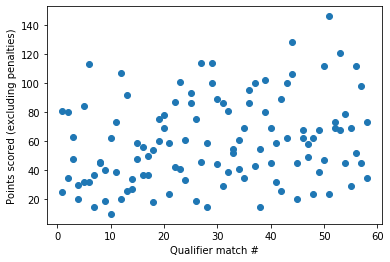

In [252]:
# graph score over time
plt.scatter(
    pd.concat([qualification_matches['match_number'], qualification_matches['match_number']], axis=1),
    pd.concat([qualification_matches['blue_points_scored'], qualification_matches['red_points_scored']], axis=1)
)
plt.xlabel('Qualifier match #')
plt.ylabel('Points scored (excluding penalties)')

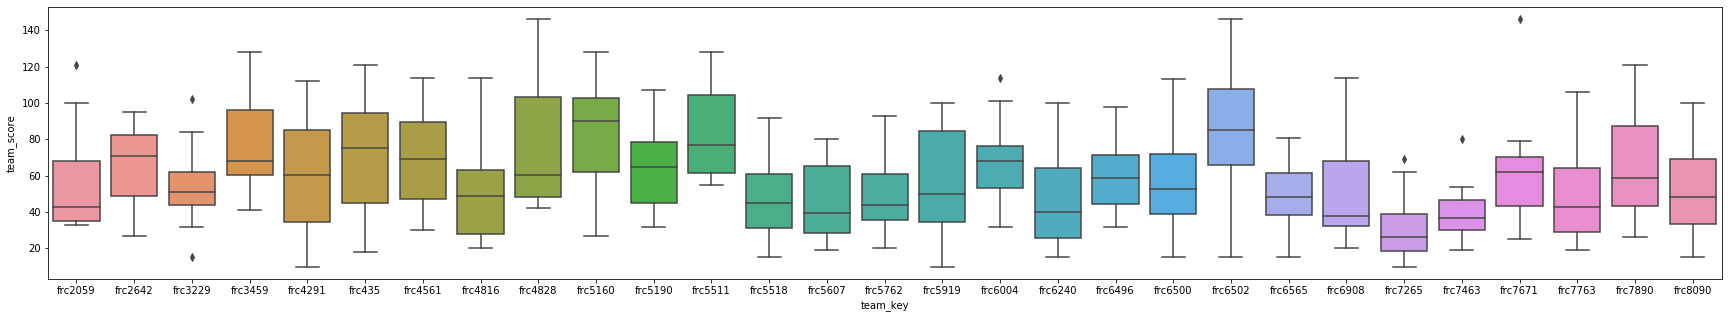

In [253]:
# boxplot team scores
plt.figure(figsize=(30,5))
sns.boxplot(x="team_key", y="team_score", data=team_scores)

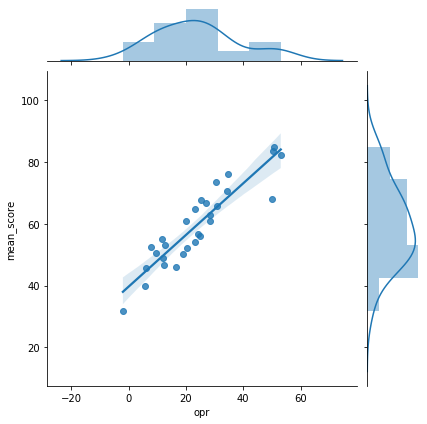

In [256]:
# joint plot opr/team scores
sns.jointplot('opr', 'mean_score', data=team_data, kind='reg')

In [ ]:
# alright, stats time
# let's see what variables have the biggest effect on team score
reg = linear_model.LinearRegression()
x = []
y = []
for _, team_data_row in team_data.iterrows():
    x.append([
        team_data_row['opr'],
        team_data_row['']        
   y.append(team_data_row['mean_score']) ])
    
reg.fit(x, y
] ])